In [1]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wg

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier as xgbc
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier as dc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix

from sklearn.utils import resample

wg.filterwarnings('ignore')

df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Breast_caner_classification.csv')

df.info()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

1) ID number

2) Diagnosis (M = malignant, B = benign)


3-32) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
#dropping the Id and unanamed: 32
df.drop(['id', 'Unnamed: 32'],axis = 1, inplace=True)
df.info()
columns = df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [3]:
iqr = df.describe()
for i in columns[1:]:
  print('In', i,': ')
  print('Majority of the Data is spread within a Range: ',iqr[i][4],'<-->',iqr[i][6], end='\n\n')

for i in columns[1:]:
  print('In', i,': ')
  print('Median of the Data is  : ',iqr[i][5], end='\n\n')


In radius_mean : 
Majority of the Data is spread within a Range:  11.7 <--> 15.78

In texture_mean : 
Majority of the Data is spread within a Range:  16.17 <--> 21.8

In perimeter_mean : 
Majority of the Data is spread within a Range:  75.17 <--> 104.1

In area_mean : 
Majority of the Data is spread within a Range:  420.3 <--> 782.7

In smoothness_mean : 
Majority of the Data is spread within a Range:  0.08637 <--> 0.1053

In compactness_mean : 
Majority of the Data is spread within a Range:  0.06492 <--> 0.1304

In concavity_mean : 
Majority of the Data is spread within a Range:  0.029560000000000003 <--> 0.1307

In concave points_mean : 
Majority of the Data is spread within a Range:  0.020309999999999998 <--> 0.07400000000000001

In symmetry_mean : 
Majority of the Data is spread within a Range:  0.1619 <--> 0.1957

In fractal_dimension_mean : 
Majority of the Data is spread within a Range:  0.0577 <--> 0.06612

In radius_se : 
Majority of the Data is spread within a Range:  0.2324 

In [4]:
#Sample Data
sample_data = df.loc[:,columns[1:]]
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# **Exploratory Data Analysis**
### **Uni-variate Analysis**
1. PDF
2. CDF
3. Box plot
4. Violin plot



In [5]:
#Replacing the Labels with the unique integer values

#Creating the object of Label Encoder.
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.diagnosis


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

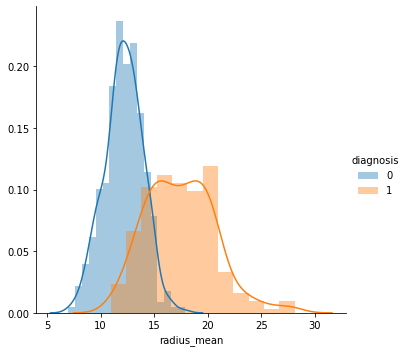

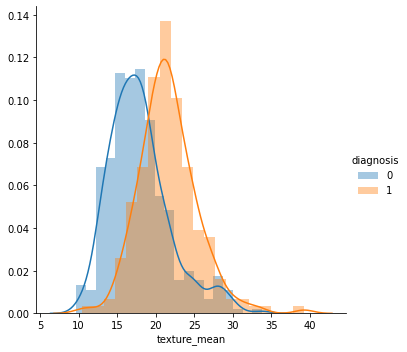

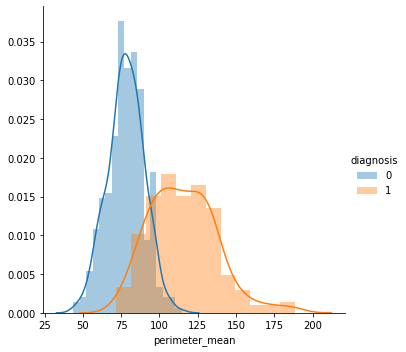

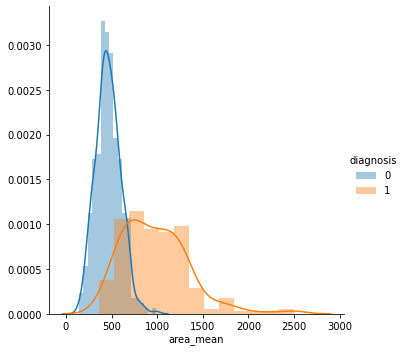

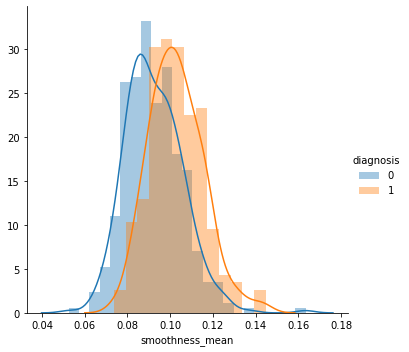

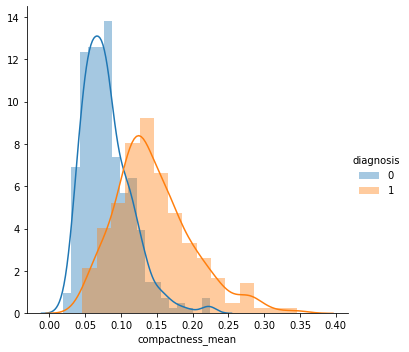

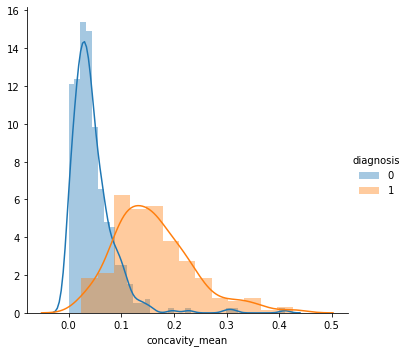

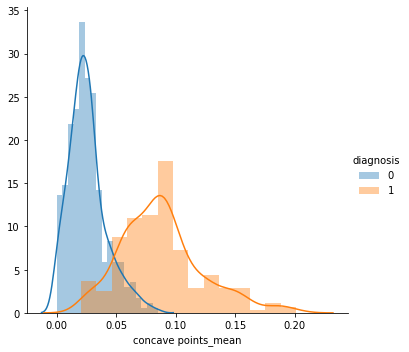

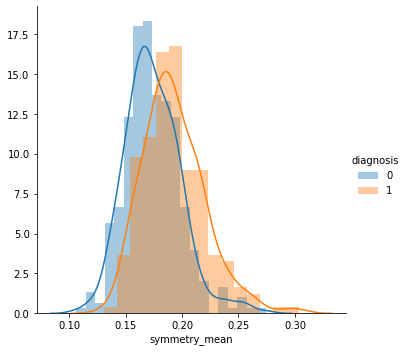

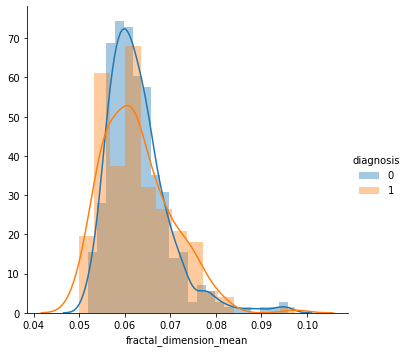

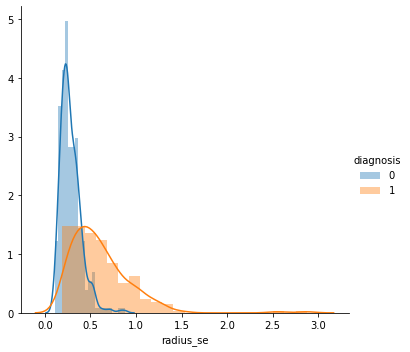

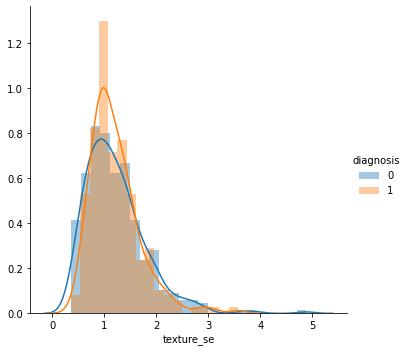

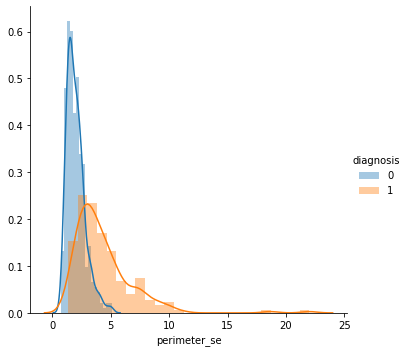

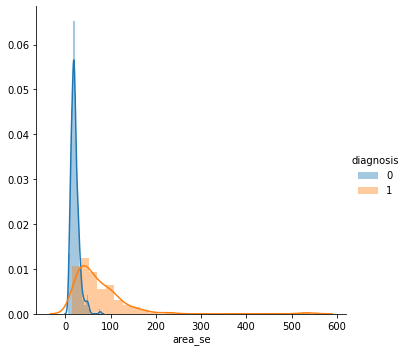

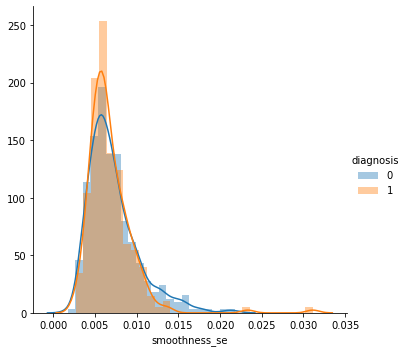

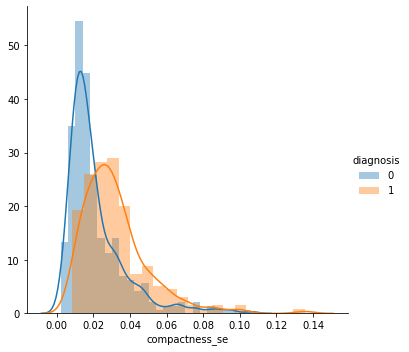

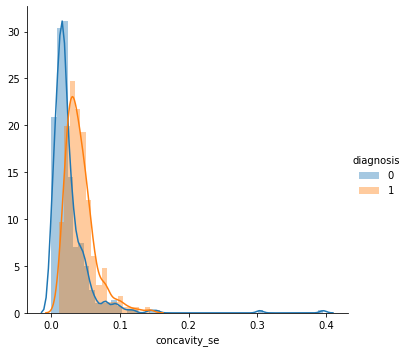

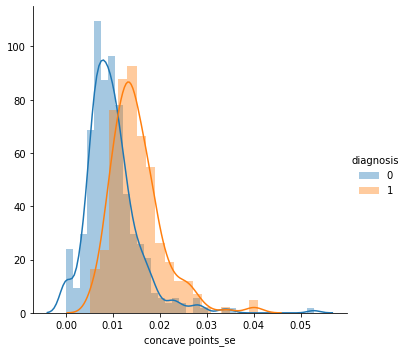

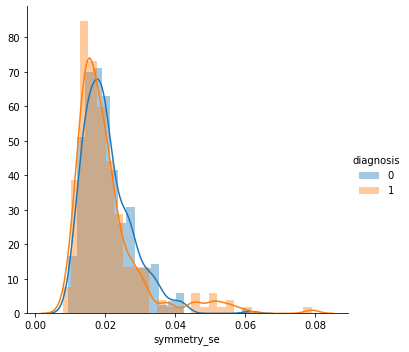

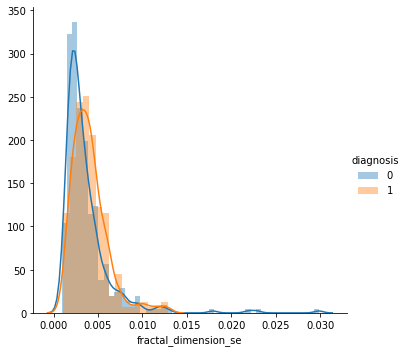

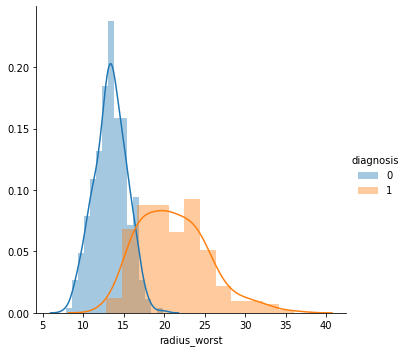

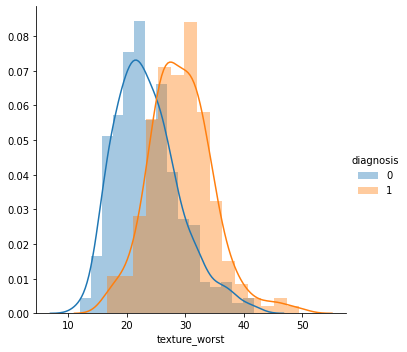

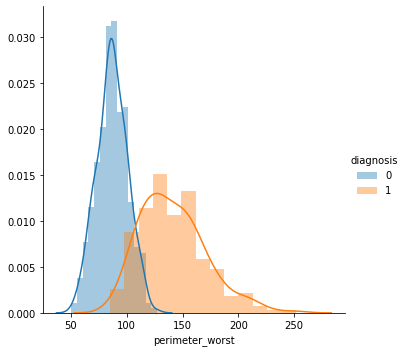

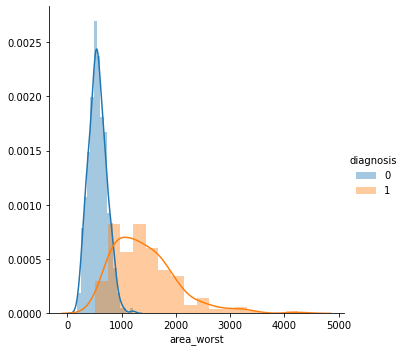

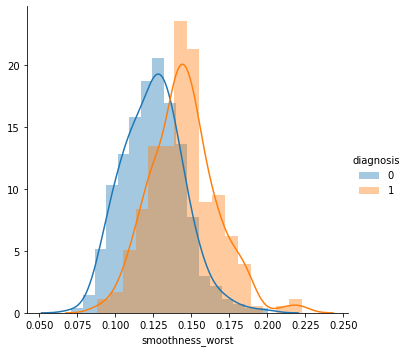

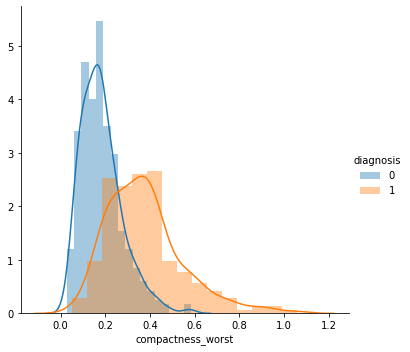

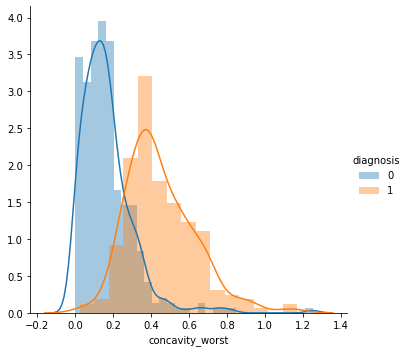

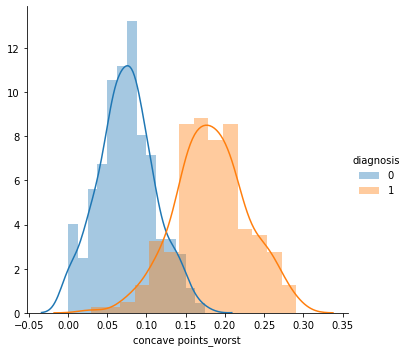

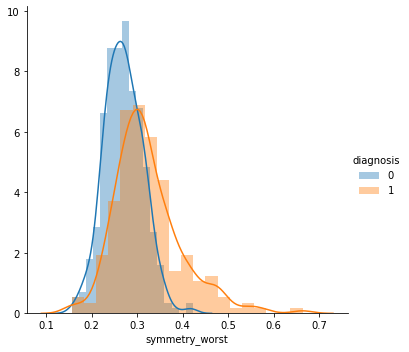

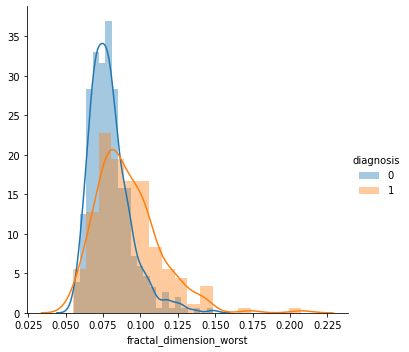

In [6]:
#PDF of Each feature with respect to the Diagnosis (Target Variable.) 
columns = list(df.columns)
for i in columns[1:]:
  sns.FacetGrid(df, hue="diagnosis", size=5) \
   .map(sns.distplot, i) \
   .add_legend();
  plt.show();


features which are able to classify the diagnosis with the less than 35% missclassification are :

1. Radius mean.
2. perimeter mean.
3. Area mean.
4. Concave points mean. 
5. Radius worst.
6. Perimeter worst.
7. Area worst.
8. Concavity Worst. 
9. Concave points worst.

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#function to identify index in which percentage is greater than 90% in the given list.
def percentage(lst):
  lst = list(lst)
  for i in lst:
    if (i*100) > 90:
      return lst.index(i)
  


In radius_mean : 
90.86 % of values lie below  19.6584 value


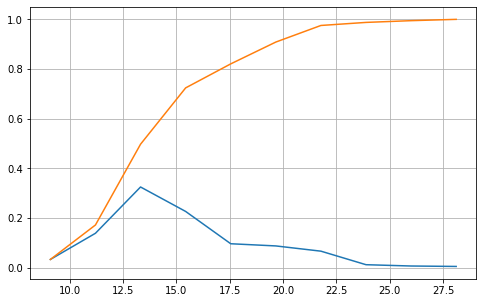

In texture_mean : 
95.08 % of values lie below  27.451999999999998 value


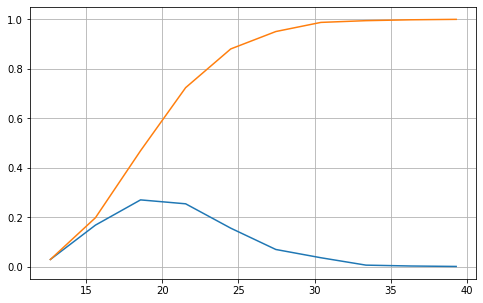

In perimeter_mean : 
91.39 % of values lie below  130.61599999999999 value


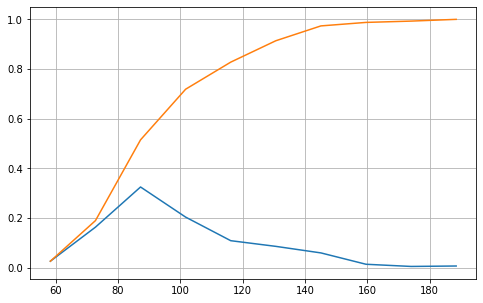

In area_mean : 
95.43 % of values lie below  1322.25 value


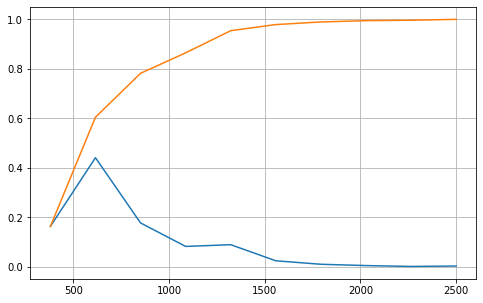

In smoothness_mean : 
95.08 % of values lie below  0.11909199999999999 value


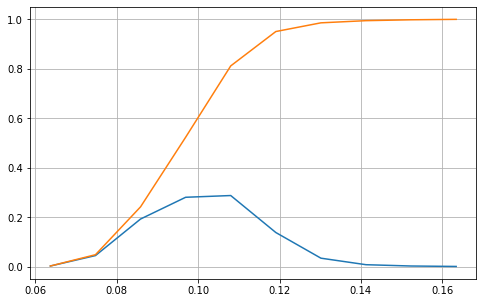

In compactness_mean : 
91.04 % of values lie below  0.18239 value


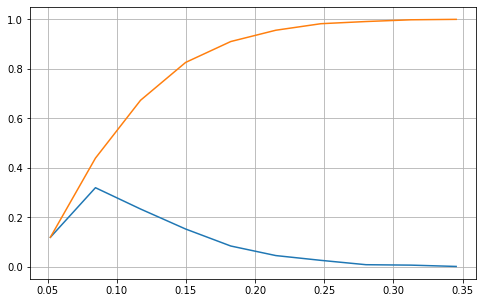

In concavity_mean : 
91.74 % of values lie below  0.2134 value


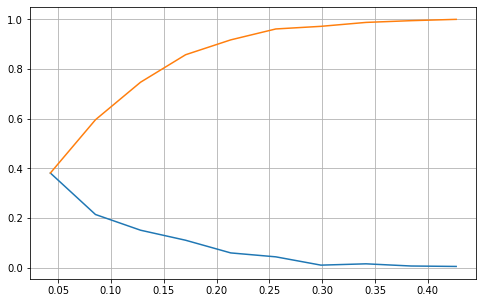

In concave points_mean : 
94.02 % of values lie below  0.12072 value


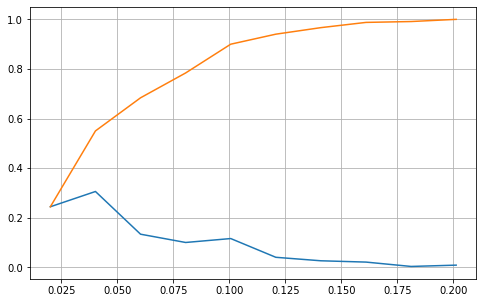

In symmetry_mean : 
93.67 % of values lie below  0.2248 value


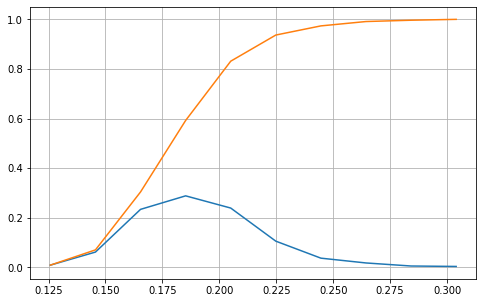

In fractal_dimension_mean : 
92.79 % of values lie below  0.0737 value


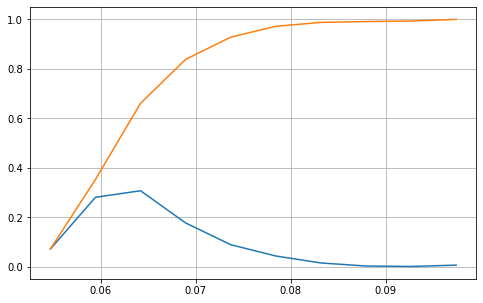

In radius_se : 
94.55 % of values lie below  0.9399500000000001 value


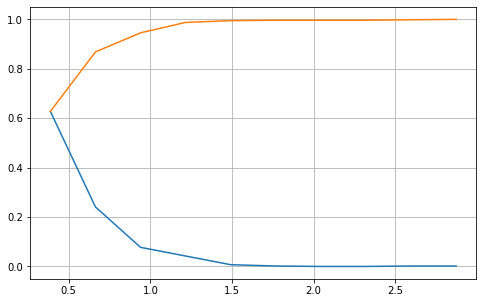

In texture_se : 
94.38 % of values lie below  2.17012 value


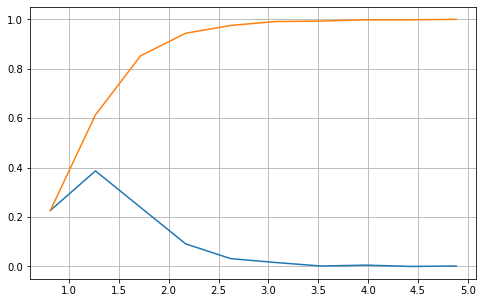

In perimeter_se : 
95.08 % of values lie below  7.1239 value


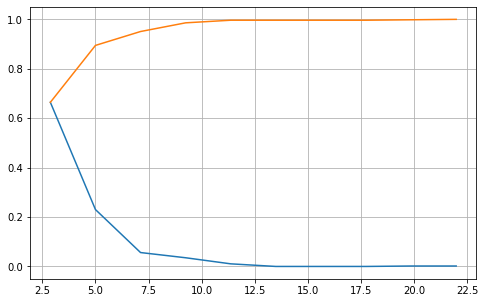

In area_se : 
94.73 % of values lie below  113.8816 value


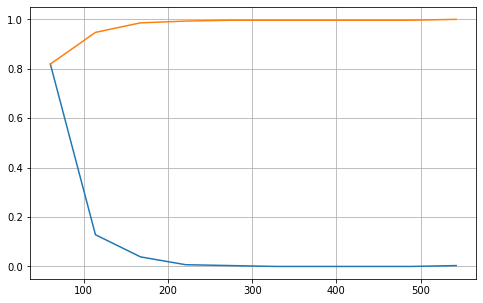

In smoothness_se : 
90.51 % of values lie below  0.0105381 value


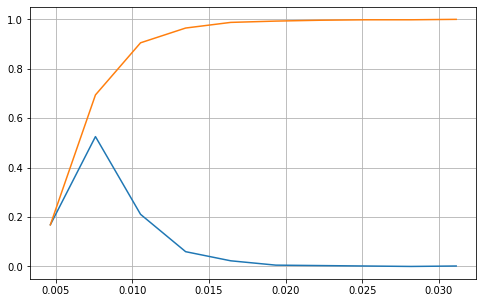

In compactness_se : 
93.32 % of values lie below  0.05551119999999999 value


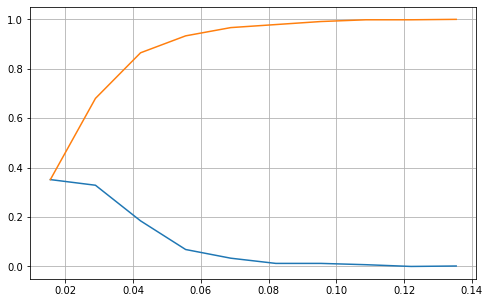

In concavity_se : 
94.9 % of values lie below  0.0792 value


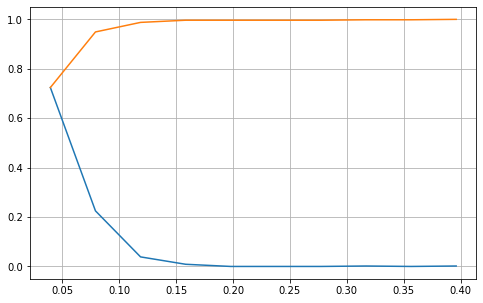

In concave points_se : 
93.15 % of values lie below  0.021116 value


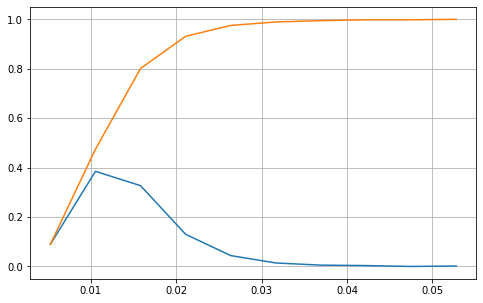

In symmetry_se : 
95.25 % of values lie below  0.0363092 value


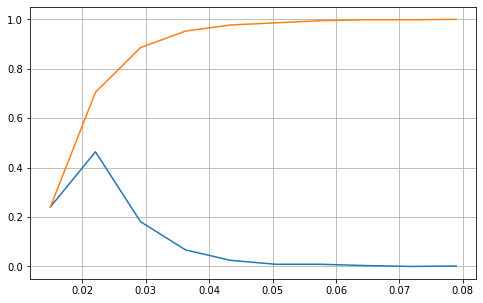

In fractal_dimension_se : 
91.21 % of values lie below  0.00668384 value


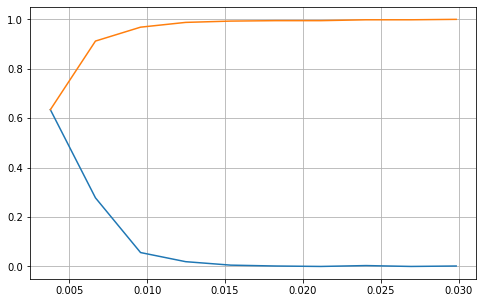

In radius_worst : 
93.15 % of values lie below  24.796 value


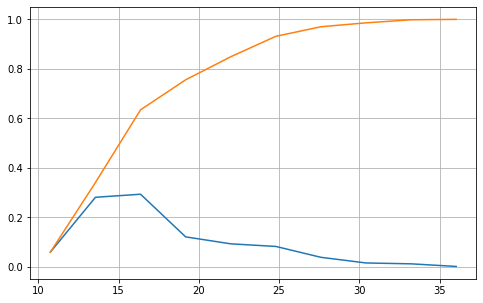

In texture_worst : 
92.27 % of values lie below  34.532 value


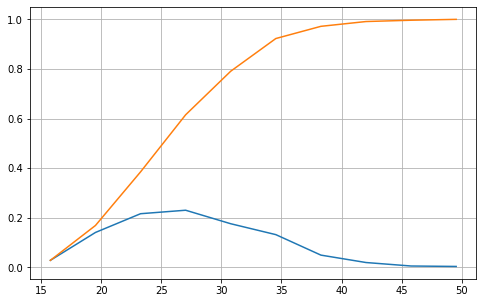

In perimeter_worst : 
94.55 % of values lie below  170.88400000000001 value


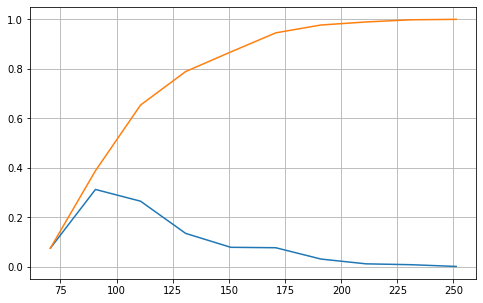

In area_worst : 
92.27 % of values lie below  1812.72 value


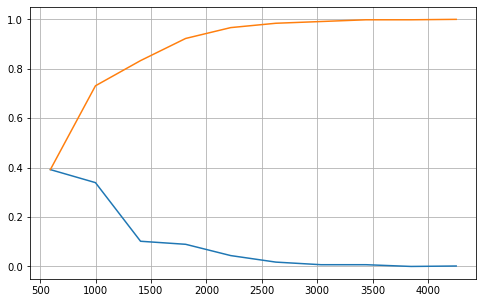

In smoothness_worst : 
95.96 % of values lie below  0.177171 value


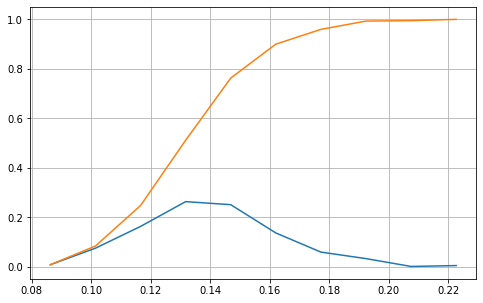

In compactness_worst : 
94.2 % of values lie below  0.542645 value


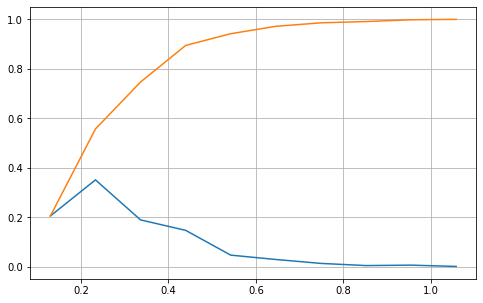

In concavity_worst : 
92.62 % of values lie below  0.626 value


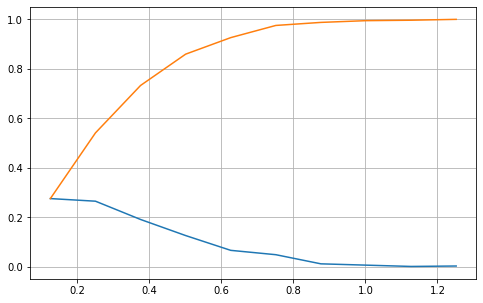

In concave points_worst : 
94.55 % of values lie below  0.23280000000000003 value


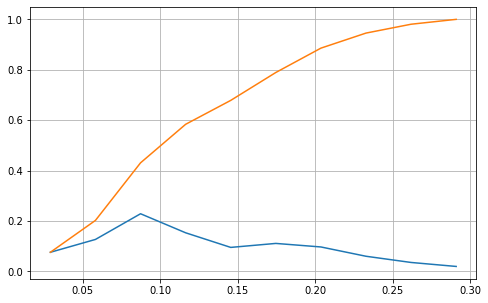

In symmetry_worst : 
95.61 % of values lie below  0.41015 value


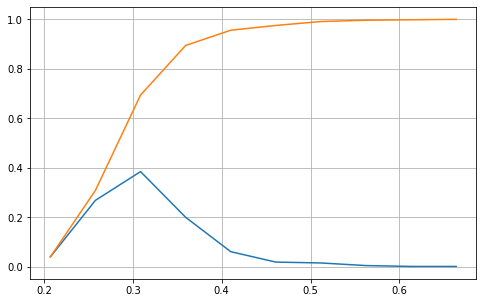

In fractal_dimension_worst : 
93.5 % of values lie below  0.11602399999999999 value


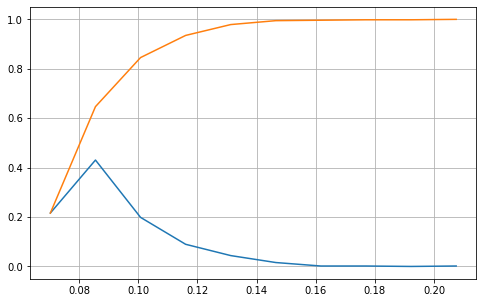

In [9]:
# PDF curve along with the CDF is drawn specifiying the particular value below which 90% of the values are present. 
for i in columns[1:]:
  plt.subplots(figsize=(8,5))
  print("In",i,': ')
  counts, bin_edges = np.histogram(df[i], bins=10, 
                                 density = True)
  pdf = counts/(sum(counts))
  
  cdf = np.cumsum(pdf)
  l = percentage(cdf)
  print(round(cdf[l]*100,2),'% of values lie below ' ,bin_edges[1:][l],'value', end='\n')

  plt.plot(bin_edges[1:],pdf);
  plt.plot(bin_edges[1:], cdf)
  plt.grid()
  plt.show();


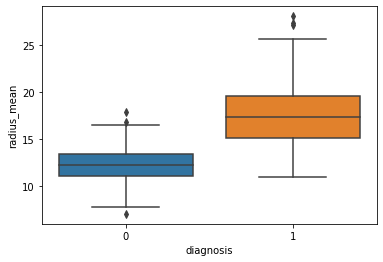

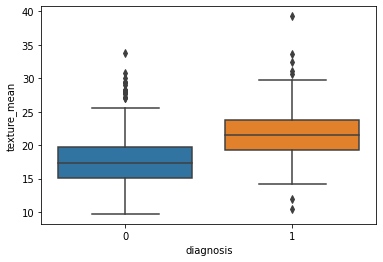

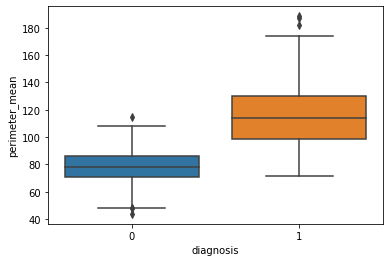

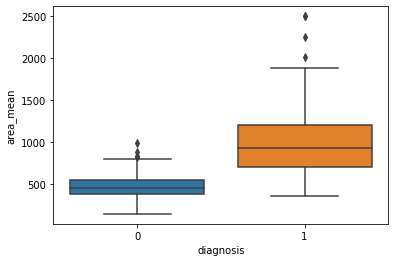

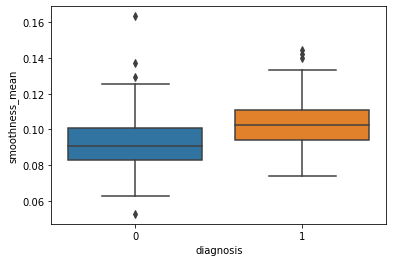

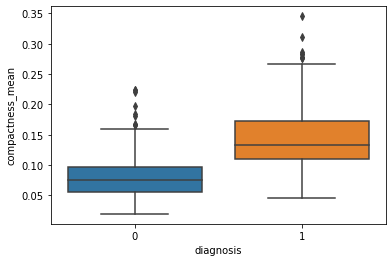

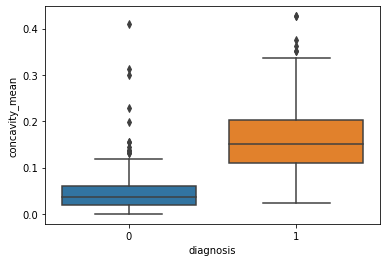

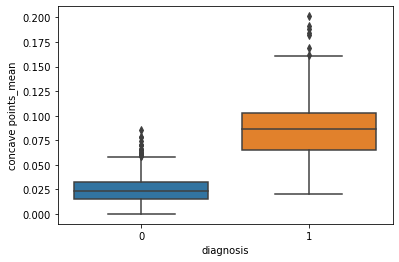

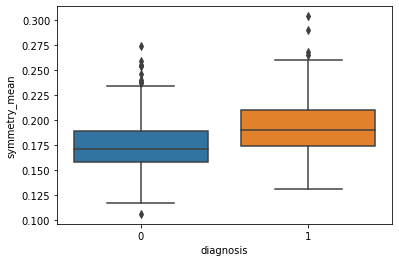

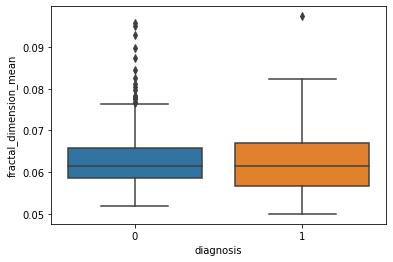

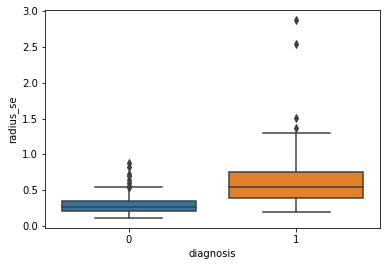

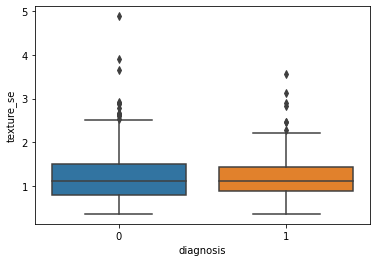

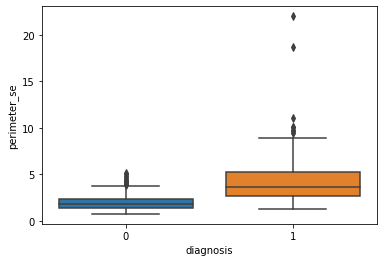

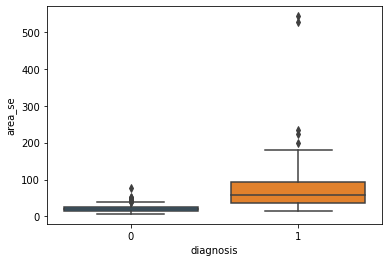

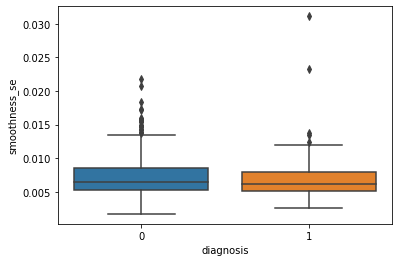

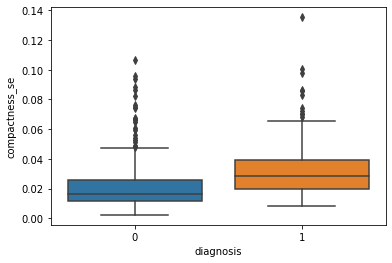

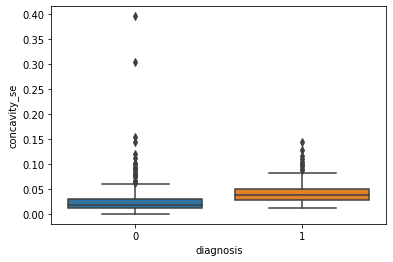

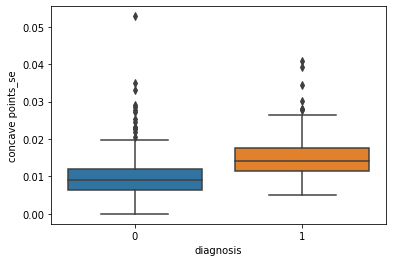

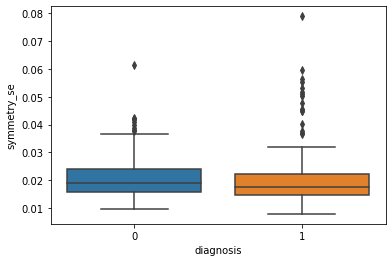

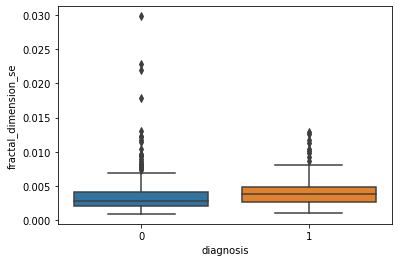

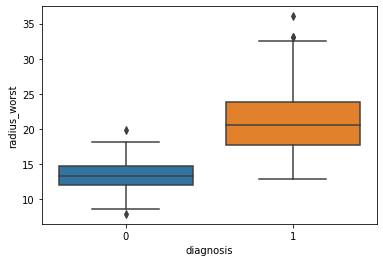

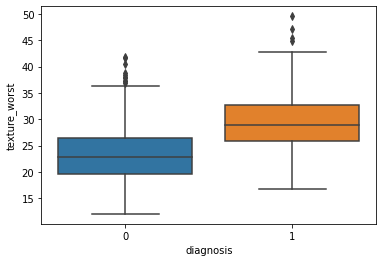

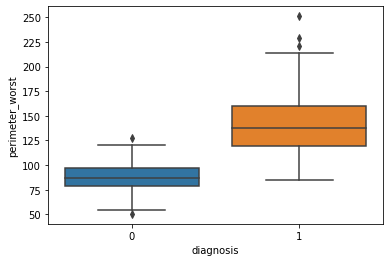

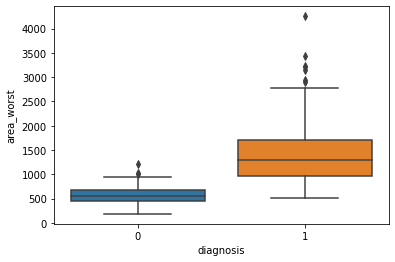

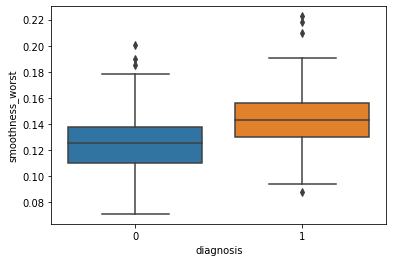

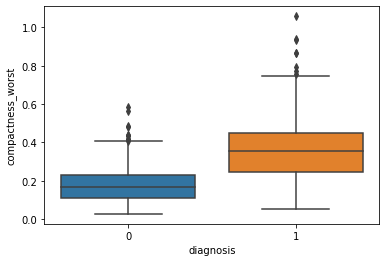

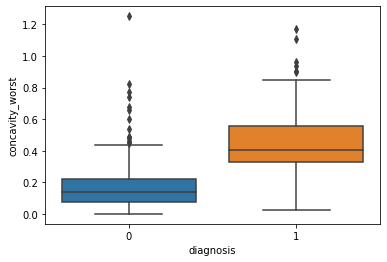

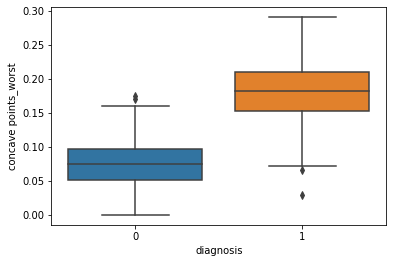

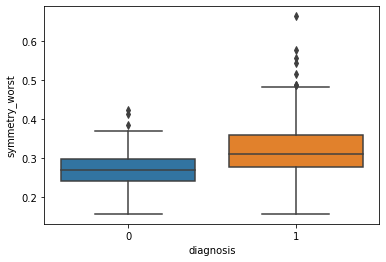

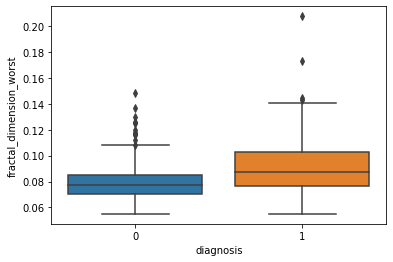

In [10]:
#Boxplot to identify Outliers in each feature with respect to the diagnosis.
for i in columns[1:]:
  sns.boxplot(x='diagnosis', y= i, data = df)
  plt.show()

## **Observations:**
Outliers are present in each feature in the above BOX-plots. 

# **Boostrapping Confidence interval with the sample size of 569 for the statistics  median and variance:**


In radius_mean: 


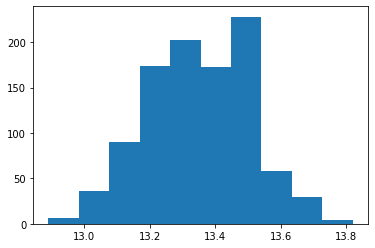

95.0 Median confidence interval is in range [ 13.050000 , 13.640250 ]



In texture_mean: 


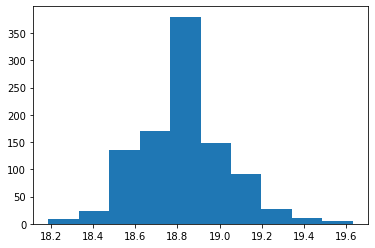

95.0 Median confidence interval is in range [ 18.450000 , 19.320000 ]



In perimeter_mean: 


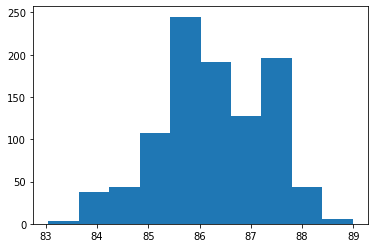

95.0 Median confidence interval is in range [ 84.130000 , 88.050250 ]



In area_mean: 


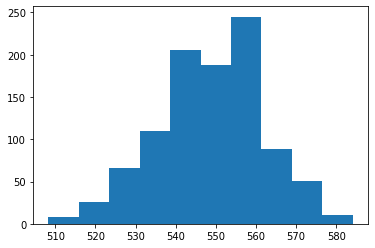

95.0 Median confidence interval is in range [ 519.995000 , 573.200000 ]



In smoothness_mean: 


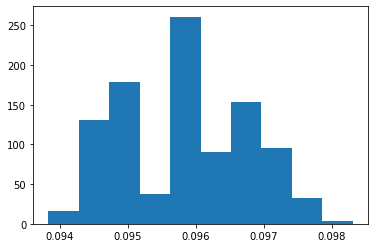

95.0 Median confidence interval is in range [ 0.094340 , 0.097510 ]



In compactness_mean: 


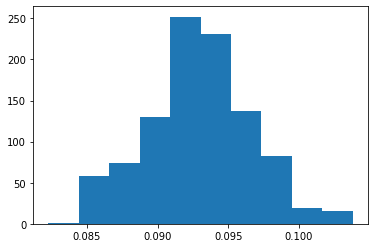

95.0 Median confidence interval is in range [ 0.085750 , 0.099664 ]



In concavity_mean: 


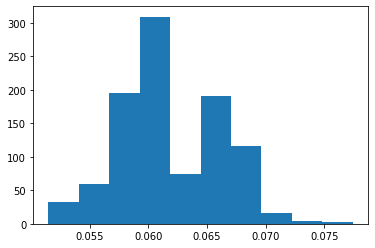

95.0 Median confidence interval is in range [ 0.053750 , 0.069500 ]



In concave points_mean: 


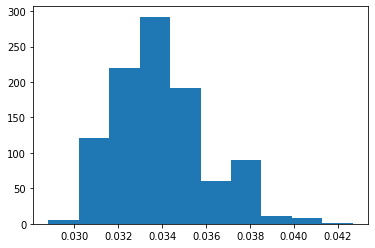

95.0 Median confidence interval is in range [ 0.030850 , 0.037917 ]



In symmetry_mean: 


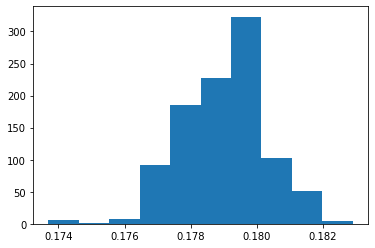

95.0 Median confidence interval is in range [ 0.176700 , 0.181300 ]



In fractal_dimension_mean: 


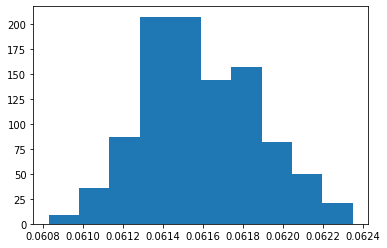

95.0 Median confidence interval is in range [ 0.061130 , 0.062170 ]



In radius_se: 


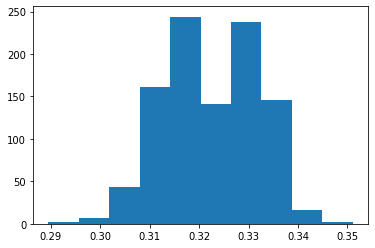

95.0 Median confidence interval is in range [ 0.306000 , 0.338000 ]



In texture_se: 


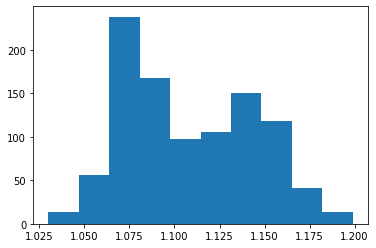

95.0 Median confidence interval is in range [ 1.049950 , 1.169000 ]



In perimeter_se: 


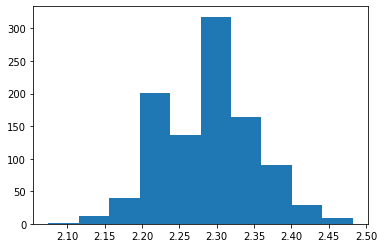

95.0 Median confidence interval is in range [ 2.177000 , 2.407000 ]



In area_se: 


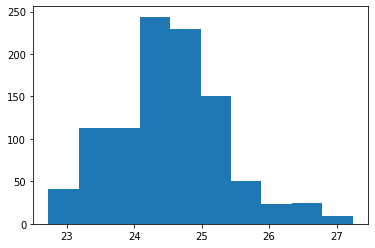

95.0 Median confidence interval is in range [ 23.120000 , 26.440250 ]



In smoothness_se: 


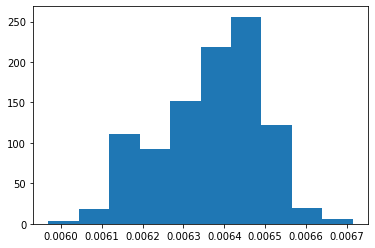

95.0 Median confidence interval is in range [ 0.006122 , 0.006578 ]



In compactness_se: 


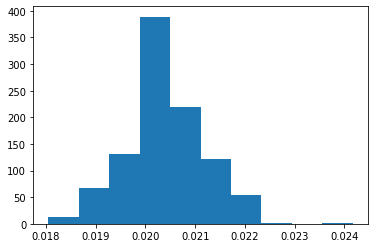

95.0 Median confidence interval is in range [ 0.018849 , 0.021990 ]



In concavity_se: 


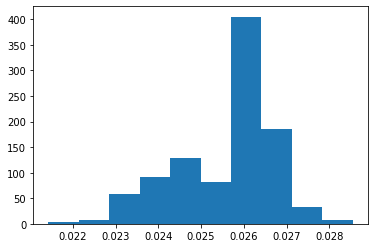

95.0 Median confidence interval is in range [ 0.023220 , 0.027210 ]



In concave points_se: 


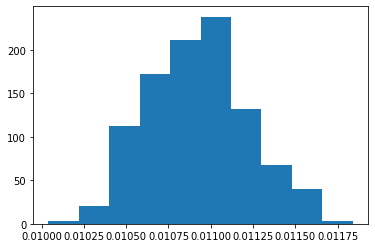

95.0 Median confidence interval is in range [ 0.010400 , 0.011550 ]



In symmetry_se: 


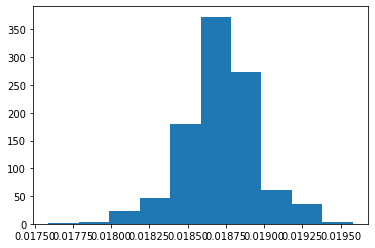

95.0 Median confidence interval is in range [ 0.018180 , 0.019240 ]



In fractal_dimension_se: 


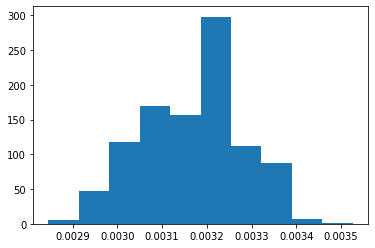

95.0 Median confidence interval is in range [ 0.002928 , 0.003359 ]



In radius_worst: 


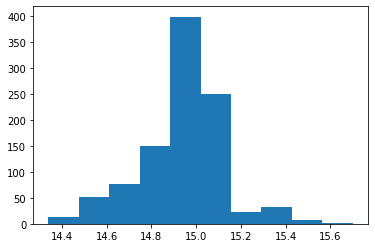

95.0 Median confidence interval is in range [ 14.499750 , 15.330000 ]



In texture_worst: 


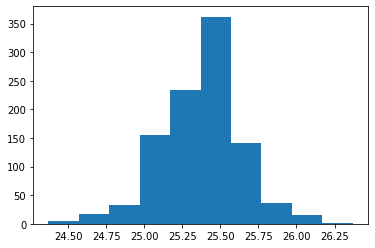

95.0 Median confidence interval is in range [ 24.770000 , 25.820500 ]



In perimeter_worst: 


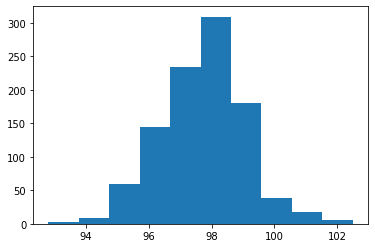

95.0 Median confidence interval is in range [ 95.230000 , 100.400000 ]



In area_worst: 


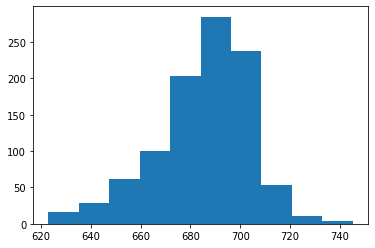

95.0 Median confidence interval is in range [ 639.100000 , 715.500000 ]



In smoothness_worst: 


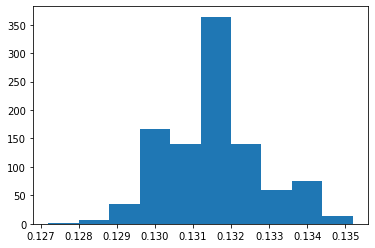

95.0 Median confidence interval is in range [ 0.129200 , 0.134200 ]



In compactness_worst: 


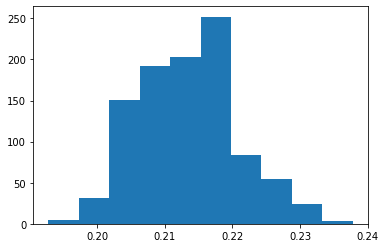

95.0 Median confidence interval is in range [ 0.201000 , 0.229100 ]



In concavity_worst: 


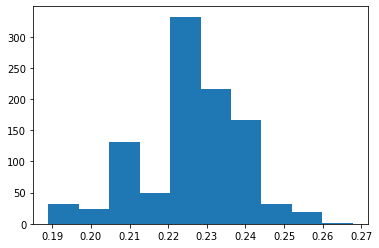

95.0 Median confidence interval is in range [ 0.195600 , 0.249220 ]



In concave points_worst: 


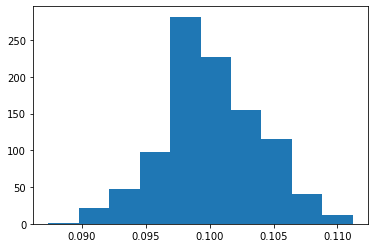

95.0 Median confidence interval is in range [ 0.092220 , 0.107500 ]



In symmetry_worst: 


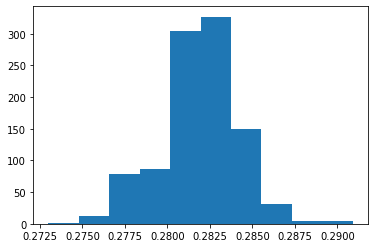

95.0 Median confidence interval is in range [ 0.276995 , 0.285917 ]



In fractal_dimension_worst: 


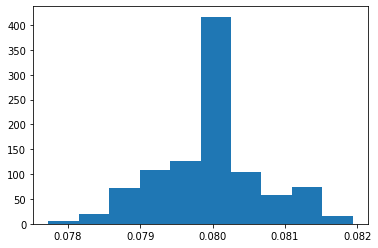

95.0 Median confidence interval is in range [ 0.078580 , 0.081510 ]





In [11]:
#for the Statistic median.

for i in columns[1:]:
  x = df[i]
  a_string ="In " + str(i)+': '
  bolded_string = "\033[1m" + a_string + "\033[0m"
  print(bolded_string)
  # configure bootstrap
  n_iterations = 1000
  n_size = int(len(x)) # size of each boostrap sample

  # run bootstrap for median statistic . you can replace with the statistic you want. 
  medians = list()
  for i in range(n_iterations):
      # prepare train and test sets
      s = resample(x, n_samples=n_size);
      m = np.median(s);
      #print(m)
      medians.append(m)

  # plot scores
  pyplot.hist(medians)
  pyplot.show()

  # confidence intervals
  alpha = 0.95
  p = ((1.0-alpha)/2.0) * 100
  lower =  np.percentile(medians, p)

  p = (alpha+((1.0-alpha)/2.0)) * 100
  upper =  np.percentile(medians, p)
  
  print('%.1f Median confidence interval is in range [ %.6f , %.6f ]' % (alpha*100, lower, upper))
  print('\n\n')


In radius_mean: 


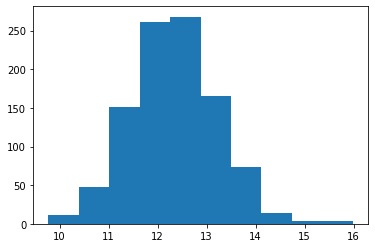

95.0 Variance confidence interval is in range [10.672200 , 14.016019]



In texture_mean: 


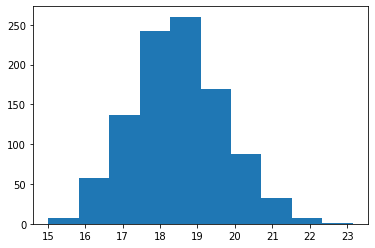

95.0 Variance confidence interval is in range [16.217461 , 20.977682]



In perimeter_mean: 


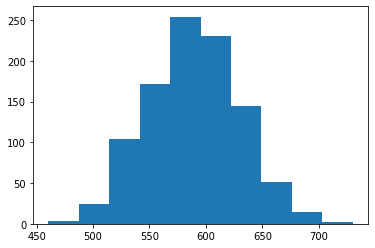

95.0 Variance confidence interval is in range [511.071788 , 669.722788]



In area_mean: 


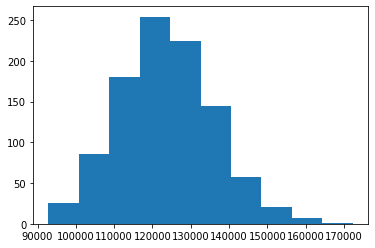

95.0 Variance confidence interval is in range [100712.159099 , 149580.564645]



In smoothness_mean: 


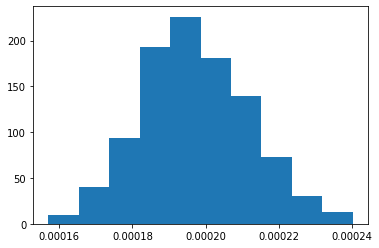

95.0 Variance confidence interval is in range [0.000170 , 0.000228]



In compactness_mean: 


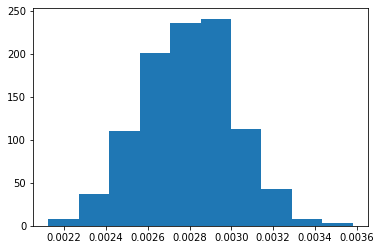

95.0 Variance confidence interval is in range [0.002361 , 0.003210]



In concavity_mean: 


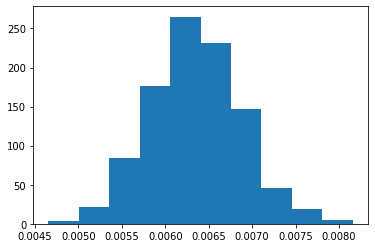

95.0 Variance confidence interval is in range [0.005357 , 0.007426]



In concave points_mean: 


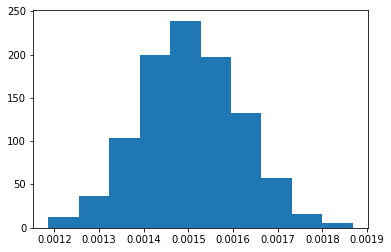

95.0 Variance confidence interval is in range [0.001288 , 0.001720]



In symmetry_mean: 


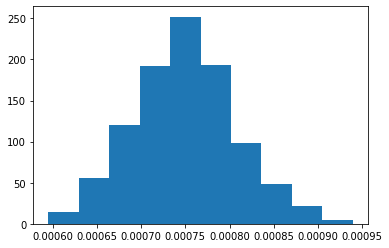

95.0 Variance confidence interval is in range [0.000642 , 0.000872]



In fractal_dimension_mean: 


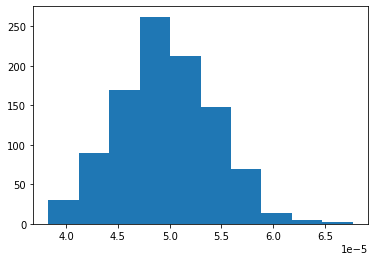

95.0 Variance confidence interval is in range [0.000041 , 0.000059]



In radius_se: 


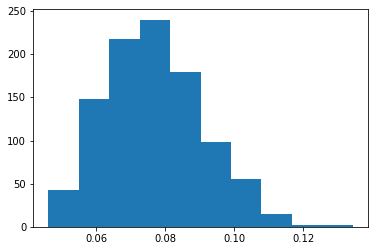

95.0 Variance confidence interval is in range [0.053348 , 0.106317]



In texture_se: 


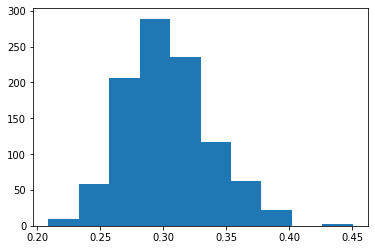

95.0 Variance confidence interval is in range [0.246531 , 0.376942]



In perimeter_se: 


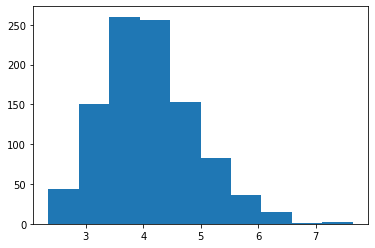

95.0 Variance confidence interval is in range [2.752340 , 5.836922]



In area_se: 


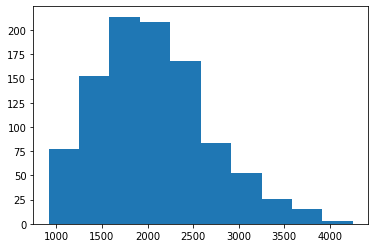

95.0 Variance confidence interval is in range [1074.655943 , 3490.194847]



In smoothness_se: 


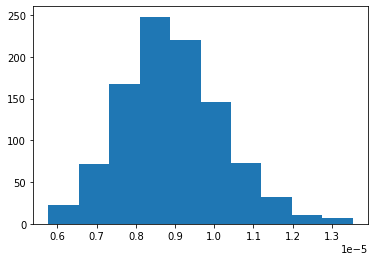

95.0 Variance confidence interval is in range [0.000007 , 0.000012]



In compactness_se: 


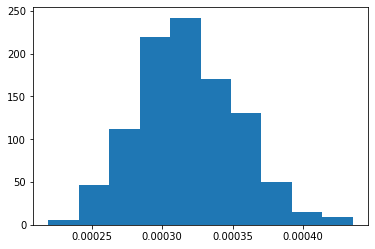

95.0 Variance confidence interval is in range [0.000250 , 0.000391]



In concavity_se: 


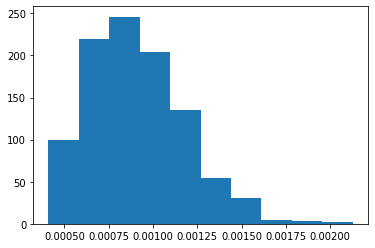

95.0 Variance confidence interval is in range [0.000492 , 0.001475]



In concave points_se: 


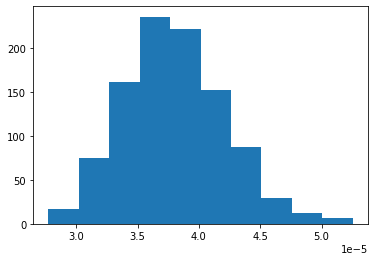

95.0 Variance confidence interval is in range [0.000031 , 0.000047]



In symmetry_se: 


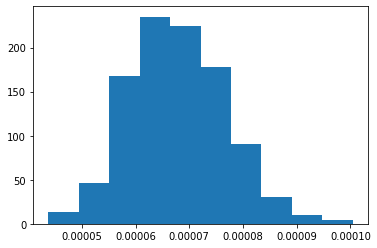

95.0 Variance confidence interval is in range [0.000052 , 0.000085]



In fractal_dimension_se: 


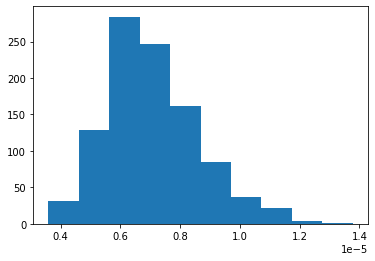

95.0 Variance confidence interval is in range [0.000005 , 0.000011]



In radius_worst: 


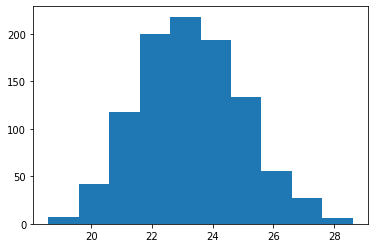

95.0 Variance confidence interval is in range [20.152092 , 26.711427]



In texture_worst: 


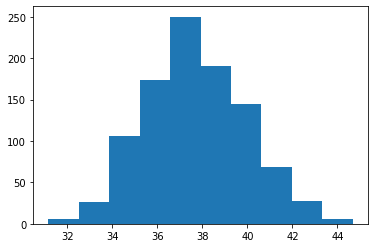

95.0 Variance confidence interval is in range [33.574594 , 42.236174]



In perimeter_worst: 


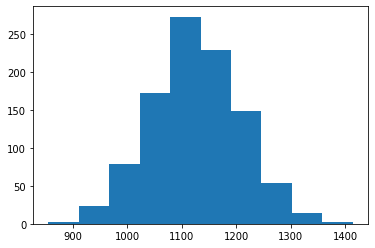

95.0 Variance confidence interval is in range [964.289619 , 1287.251239]



In area_worst: 


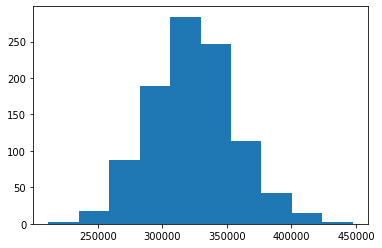

95.0 Variance confidence interval is in range [261071.520561 , 394842.957109]



In smoothness_worst: 


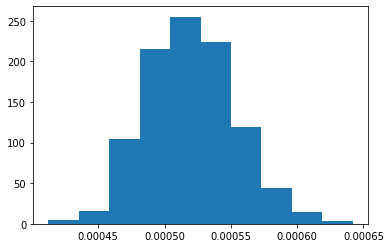

95.0 Variance confidence interval is in range [0.000461 , 0.000587]



In compactness_worst: 


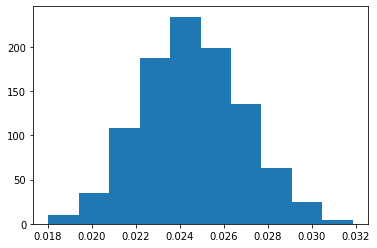

95.0 Variance confidence interval is in range [0.020160 , 0.029293]



In concavity_worst: 


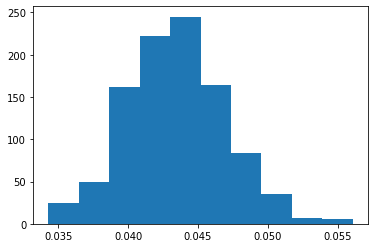

95.0 Variance confidence interval is in range [0.036578 , 0.050517]



In concave points_worst: 


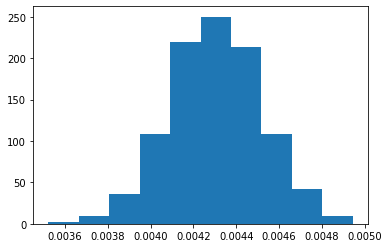

95.0 Variance confidence interval is in range [0.003860 , 0.004722]



In symmetry_worst: 


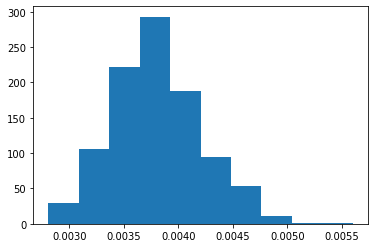

95.0 Variance confidence interval is in range [0.003076 , 0.004674]



In fractal_dimension_worst: 


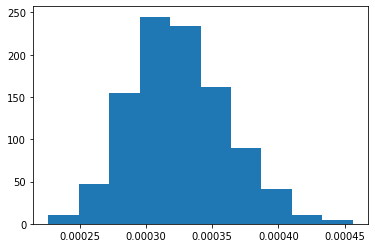

95.0 Variance confidence interval is in range [0.000262 , 0.000406]





In [12]:
#for the Statistic Variance.

for i in columns[1:]:
  x = df[i]
  a_string ="In " + str(i)+': '
  bolded_string = "\033[1m" + a_string + "\033[0m"
  print(bolded_string)
  # configure bootstrap
  n_iterations = 1000
  n_size = int(len(x)) # size of each boostrap sample

  # run bootstrap for median statistic . you can replace with the statistic you want. 
  variance = list()
  for i in range(n_iterations):
      # prepare train and test sets
      s = resample(x, n_samples=n_size);
      m = np.var(s);
      #print(m)
      variance.append(m)

  # plot scores
  pyplot.hist(variance)
  pyplot.show()

  # confidence intervals
  alpha = 0.95
  p = ((1.0-alpha)/2.0) * 100
  lower =  np.percentile(variance, p)

  p = (alpha+((1.0-alpha)/2.0)) * 100
  upper =  np.percentile(variance, p)
  
  print('%.1f Variance confidence interval is in range [%.6f , %.6f]' % (alpha*100, lower, upper))
  print('\n\n')


### Performing Dimensionality Reduction using PCA in two ways:
1. Combining the each field i.e reducing the each field of 3 dimensions into single dimension.



In [0]:
target = pd.DataFrame(df.loc[:,'diagnosis'])
df.drop('diagnosis', axis =1, inplace =True)

In [0]:
# In this data set each field is distriuted into sub 3 categories 
# Here we are combining those sub categories into single field.

#Creating the Object of PCA
pca = PCA()

#Creating the Object for Standardization.
sc = StandardScaler()

pca.n_components=1


radius = pca.fit_transform(sc.fit_transform( df.iloc[:, [0,10,20]]))

texture = pca.fit_transform(sc.fit_transform(df.iloc[:, [1,11,21]])) 

perimeter = pca.fit_transform(sc.fit_transform(df.iloc[:, [2,12,22]]))

area = pca.fit_transform(sc.fit_transform(df.iloc[:, [3,13,23]]))

smoothness = pca.fit_transform(sc.fit_transform(df.iloc[:, [4,14,24]])) 

compactness = pca.fit_transform(sc.fit_transform(df.iloc[:, [5,15,25]]))

concavity = pca.fit_transform(sc.fit_transform(df.iloc[:, [6,16,26]])) 

concave_points = pca.fit_transform(sc.fit_transform(df.iloc[:, [7,17,27]]))

symmetry = pca.fit_transform(sc.fit_transform(df.iloc[:, [8,18,28]]))

fractal_dimension= pca.fit_transform(sc.fit_transform(df.iloc[:, [9,19,29]]))

bcc_dic = {'radius': radius, 'texture':texture, 'perimeter': perimeter, 'area': area, 'smoothness': smoothness, 'compactness':compactness, 'concavity':concavity,'symmetry':symmetry, 'concave_points': concave_points, 'fractal_dimension': fractal_dimension, 'target':target}
l = list(bcc_dic.values())


In [15]:
bcc = np.concatenate((l), axis=1)
df_new = pd.DataFrame(bcc, columns=list(bcc_dic.keys()))
df_new.append(target)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 non-null    float64
 2   perimeter          569 non-null    float64
 3   area               569 non-null    float64
 4   smoothness         569 non-null    float64
 5   compactness        569 non-null    float64
 6   concavity          569 non-null    float64
 7   symmetry           569 non-null    float64
 8   concave_points     569 non-null    float64
 9   fractal_dimension  569 non-null    float64
 10  target             569 non-null    float64
dtypes: float64(11)
memory usage: 49.0 KB


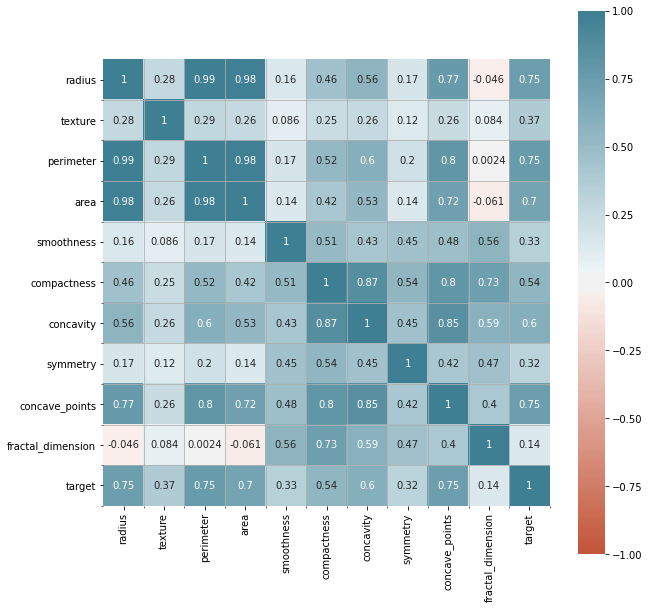

In [16]:
#Plotting the heatmap of correlation of the features.

plt.subplots(figsize = (10,10))

corr = df_new.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot= True)

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
plt.show()

# **Observations:**
### Highest correlations above the value of 0.8 are :

1. Radius is positively correlated with area and perimeter with the values of 0.98, 0.99 respectively.

2. Perimeter is positively correlated with the concave points with the value of 0.8  after radius and area.

3. Compactness is positively correlated with the Concave_points and Concavity with the corresponding values 0.8 and 0.87.

4. Concavity is positively correlated with the Concave points with a value of 0.85. 

### Correlation of Target(diagnosis) Variable with a value greater than 0.7. 
1. Radius, Perimeter, Concave points are highly Positively correlated with the Target variable with a values of 0.75.
2. Area is positively correlated with the Target variable with the value of 0.7. 

Note:

**Red colour corresponds to negative Correlation.
Green color corresponds to positive Correalation.** 

In [0]:
def model_training(X_train, y_train):
  #Dictionary to collect the number of missclassifications.
  missclassification  = {}

  #Dictionary of algorithms which are to be implmented. 
  algos = {'Support Vector Classifier':SVC, 'Decision Tree Classifier':dc, 'K-nearest-neighbours classifier':knc, 'Logistic Regression':lr,'Xgboost Clasfier: ':xgbc}

  #function to print the Accuracy score, F1 score, Auc_Roc Score and number of misclassifications and accurate classifications.
  def training(algo):
    al = algo()
    model = al.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Test Accuracy: ", round(accuracy_score(y_test, y_pred)*100,2))
    print("F1 score: ", round(f1_score(y_test, y_pred)*100, 2))
    print("ROC AUC score: ", round(roc_auc_score(y_test, y_pred)*100, 2))

    print("CONFUSION MATRIX: ")
    classified = confusion_matrix(y_test, y_pred)
    print("Correctly classified points: ",classified[0][0]+classified[1][1])
    print("Total Miss classified points: ",classified[0][1]+classified[1][0])
    return classified[0][1]+classified[1][0]

  for alg, model in algos.items():
    print('In:', alg,': ')
    
    missclassification[training(model)] = alg
    
    print('\n\n')
    
    low = min(missclassification.keys())

    
  print('In', missclassification[low], 'The number of lowest Missclassifications are: ', low)

In [18]:
#Splitting the Data set into Training and testing Dataset
X = df_new.loc[:,df_new.columns[:-1]]
y = df_new.loc[:,df_new.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 10) (114, 10) (455,) (114,)


In [19]:
#Training the model with the above defined function. 
model_training(X_train, y_train)

In: Support Vector Classifier : 
Test Accuracy:  96.49
F1 score:  95.24
ROC AUC score:  95.81
CONFUSION MATRIX: 
Correctly classified points:  110
Total Miss classified points:  4



In: Decision Tree Classifier : 
Test Accuracy:  94.74
F1 score:  93.33
ROC AUC score:  95.32
CONFUSION MATRIX: 
Correctly classified points:  108
Total Miss classified points:  6



In: K-nearest-neighbours classifier : 
Test Accuracy:  96.49
F1 score:  95.24
ROC AUC score:  95.81
CONFUSION MATRIX: 
Correctly classified points:  110
Total Miss classified points:  4



In: Logistic Regression : 
Test Accuracy:  96.49
F1 score:  95.35
ROC AUC score:  96.27
CONFUSION MATRIX: 
Correctly classified points:  110
Total Miss classified points:  4



In: Xgboost Clasfier:  : 
Test Accuracy:  96.49
F1 score:  95.35
ROC AUC score:  96.27
CONFUSION MATRIX: 
Correctly classified points:  110
Total Miss classified points:  4



In Xgboost Clasfier:  The number of lowest Missclassifications are:  4


**2. Reducing 30 diemsnions into less number of dimensions in  such a way that the variance is maximum.**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [21]:


pca_2 = PCA()
pca_2.n_components = 30

sample = sc.fit_transform(sample_data)
pca_30 = pca_2.fit_transform(sample)
variance = list(pca_2.explained_variance_ratio_.cumsum())
for i in range(len(variance)):
  print('for ',i+1, ' Dimensions', round(variance[i]*100,2),'% of variance is retained')


for  1  Dimensions 44.27 % of variance is retained
for  2  Dimensions 63.24 % of variance is retained
for  3  Dimensions 72.64 % of variance is retained
for  4  Dimensions 79.24 % of variance is retained
for  5  Dimensions 84.73 % of variance is retained
for  6  Dimensions 88.76 % of variance is retained
for  7  Dimensions 91.01 % of variance is retained
for  8  Dimensions 92.6 % of variance is retained
for  9  Dimensions 93.99 % of variance is retained
for  10  Dimensions 95.16 % of variance is retained
for  11  Dimensions 96.14 % of variance is retained
for  12  Dimensions 97.01 % of variance is retained
for  13  Dimensions 97.81 % of variance is retained
for  14  Dimensions 98.34 % of variance is retained
for  15  Dimensions 98.65 % of variance is retained
for  16  Dimensions 98.92 % of variance is retained
for  17  Dimensions 99.11 % of variance is retained
for  18  Dimensions 99.29 % of variance is retained
for  19  Dimensions 99.45 % of variance is retained
for  20  Dimensions 99

In [22]:
 for i in range(2, 20):
  a_string = "When number of dimensions is : "+ str(i)
  bolded_string = "\033[1m" + a_string + "\033[0m"
  pca_2.n_components = i
  sample = pca_2.fit_transform(sample_data)


  X = pd.DataFrame(sample)
  y = target

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.2)
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, end = '\n')

  #Training the model with the above defined function. 
  model_training(X_train, y_train)
  print(bolded_string)

  print('\n\n')

(455, 2) (114, 2) (455, 1) (114, 1)
In: Support Vector Classifier : 
Test Accuracy:  94.74
F1 score:  92.5
ROC AUC score:  93.02
CONFUSION MATRIX: 
Correctly classified points:  108
Total Miss classified points:  6



In: Decision Tree Classifier : 
Test Accuracy:  93.86
F1 score:  91.76
ROC AUC score:  93.24
CONFUSION MATRIX: 
Correctly classified points:  107
Total Miss classified points:  7



In: K-nearest-neighbours classifier : 
Test Accuracy:  94.74
F1 score:  92.68
ROC AUC score:  93.48
CONFUSION MATRIX: 
Correctly classified points:  108
Total Miss classified points:  6



In: Logistic Regression : 
Test Accuracy:  96.49
F1 score:  95.12
ROC AUC score:  95.35
CONFUSION MATRIX: 
Correctly classified points:  110
Total Miss classified points:  4



In: Xgboost Clasfier:  : 
Test Accuracy:  95.61
F1 score:  94.12
ROC AUC score:  95.1
CONFUSION MATRIX: 
Correctly classified points:  109
Total Miss classified points:  5



In Logistic Regression The number of lowest Missclassificat

# **Observations:**
1. Highest accuracy and lowest missclassification are occured when number of dimensions are 17 but we want the lowest dimension number having highest accuracy number and lowest miss classfications. 

2. After looking at various dimensions. when the number of dimensions are 3 the highest accuracy of 97% is obtained with only 3 missclassifications when logistic algorithm is used.



In [23]:
pca_2.n_components = 3
sample = pca_2.fit_transform(sample_data)
red_dim_np = np.concatenate((sample,target.values), axis =1)
red_dim_df = pd.DataFrame(red_dim_np, columns=['1', '2', '3', 'diagnosis'])
red_dim_df.describe()

,1,2,3,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-3.536480e-14,-6.700830e-14,-3.096917e-15,0.372583
std,6.661701e+02,8.549912e+01,2.652987e+01,0.483918
min,-8.631423e+02,-6.715323e+02,-6.629304e+01,0.000000
25%,-4.361926e+02,-3.122763e+01,-1.109706e+01,0.000000
50%,-2.160549e+02,-3.821966e-01,-1.112880e+00,0.000000
75%,2.326157e+02,3.146797e+01,8.843536e+00,1.000000
max,3.867178e+03,7.396209e+02,3.517681e+02,1.000000


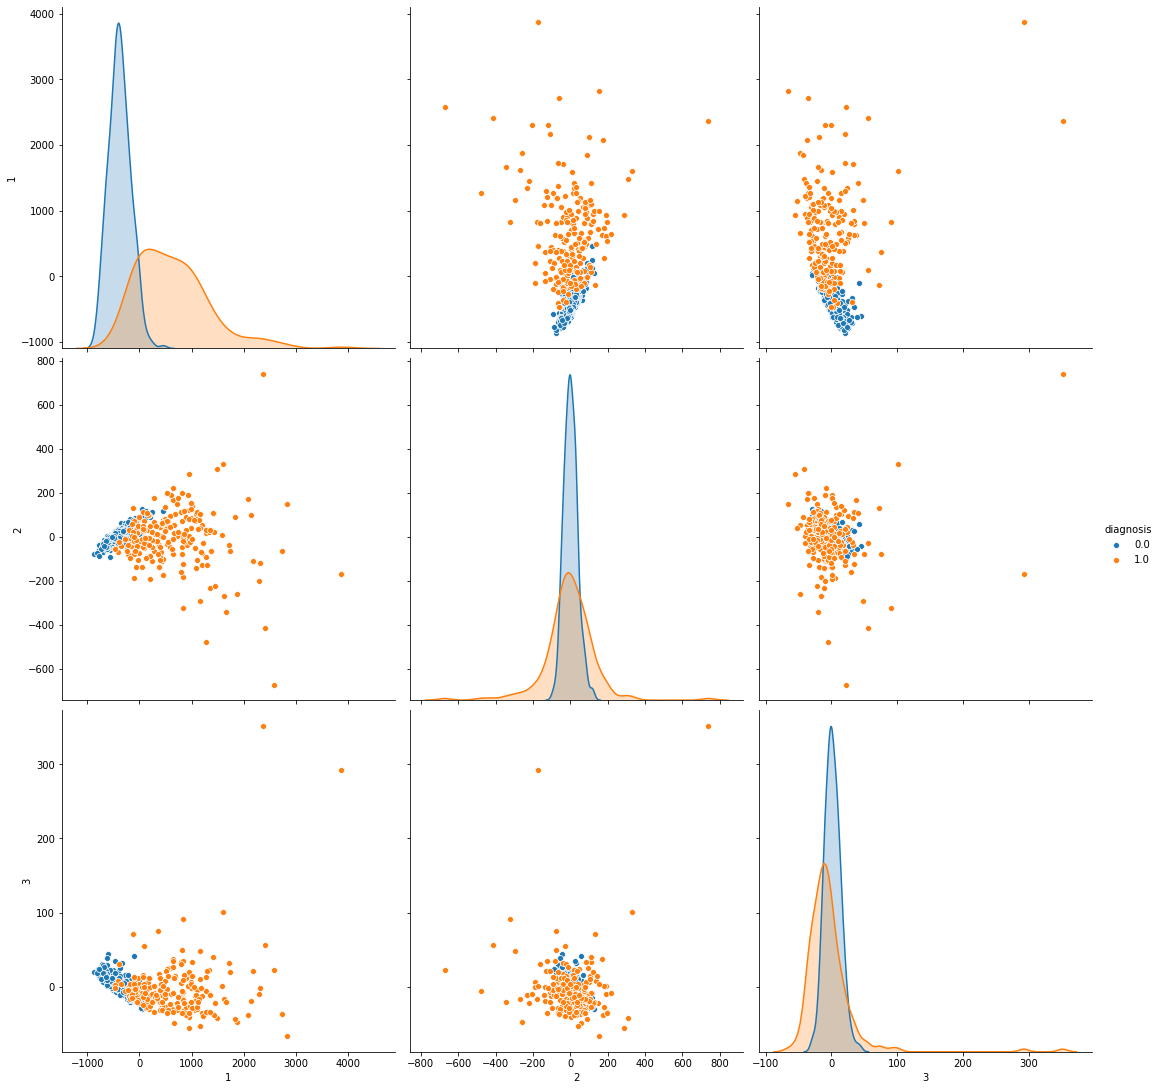

In [24]:
columns_red_dim = list(red_dim_df.columns)
sns.pairplot(red_dim_df, hue='diagnosis', size=5)
plt.show()

#**Observations:**
1. Scatter plot of feature 2 and 1 and 3 and 1 are able to classify the diagnosis to certain level where  scatter plot of feature 2 and 3 is totally merged. 

2. Feature 2 is perfectly normally distributed with highest peakedness and low variance. 

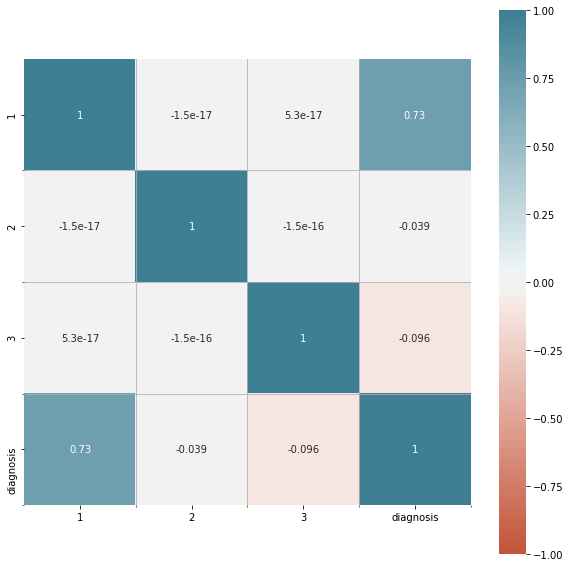

In [25]:
#Plotting the heatmap of correlation of the features.

plt.subplots(figsize = (10,10))

corr = red_dim_df.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot= True)

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
plt.show()

# **Observation:**
1. Feature 1 is in highly positively correlated with the diagnosis variable with the value of 0.73. 